# Anomalías

A diferencia de muchas cosas que hemos visto hasta ahora, como tal en Python no hay una función que calcule anomalías, porque eso va a depender de nosotros (porque es básicamente una resta y ya) pero veamos cómo podemos hacer diferentes aproximaciones a las anomalías


In [43]:
# Librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._
# Cargar los datos
fifa = pd.read_csv('fifa_data.csv')
#._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._

# Seleccionar los datos
overall = fifa[['Club', 'Overall']]

Aquí es donde viene lo bueno, suponiendo que sólo tienen esas dos columnas, cómo podríamos analizar anomalías? Realmente hay muchas maneras.
Veamos quizás la más intuitiva, comparar promedios.

In [44]:
prom_ov = np.mean(overall['Overall']).round(2) # Este es el promedio de todos los jugadores

# Obtengan el promedio del club Leicester City
team1 = np.mean(overall[overall['Club']=='Leicester City']['Overall']).round(2)
team1

73.84

In [45]:
# Entonces cómo sería la anomalía?

anom = team1 - prom_ov # Qué indica esto? Y cómo se podría plotear?

anom

7.6000000000000085

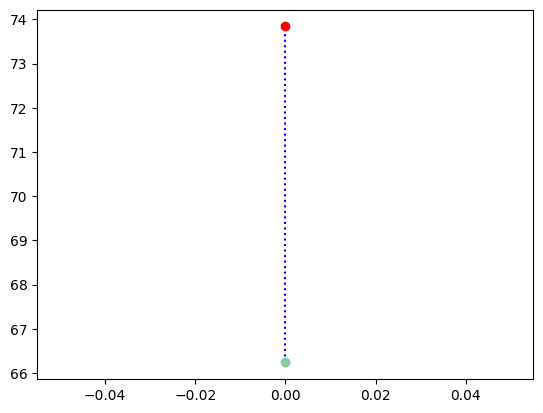

In [46]:
x = np.arange(1)
# Graficar
fig, ax = plt.subplots()
plt.scatter(x = x, y = prom_ov, color = '#88c999')
plt.scatter(x = x, y = team1, color = 'red')
plt.plot([0, 0], [prom_ov, team1], color = 'blue', linestyle = ':', zorder = 0)

Realmente no dice mucho, como estos datos están tomados en un momento en particular entonces no podemos ver si hay alguna evolución en el tiempo. No obstante sí que podemos hacer otras cosas.

Supongamos que queremos comparar no el promedio, si no los valores particulares de cada jugador comparado con el promedio global.

In [47]:
# Cargar los datos
fifa = pd.read_csv('fifa_data.csv')
#._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._

# Seleccionar los datos
overall = fifa[['Club', 'Overall']]

# Obtener promedio del overall
prom_ov = np.mean(overall['Overall']).round(2) # Este es el promedio de todos los jugadores

# Ahora obtengamos un club en particular
sevilla = overall[overall['Club'] == 'Sevilla FC']

# Ahora obtengamos la anomalía pero de cada jugador
anom_team = sevilla['Overall'] - prom_ov
anom_team

142      17.76
170      16.76
255      15.76
267      15.76
269      15.76
387      14.76
462      13.76
479      13.76
546      13.76
569      12.76
618      12.76
642      12.76
660      12.76
688      12.76
845      11.76
879      11.76
1191     10.76
1487      9.76
1764      8.76
1944      8.76
2376      7.76
4122      4.76
6758      1.76
6843      1.76
7882      0.76
9752     -0.24
9757     -0.24
11743    -2.24
12950    -3.24
14606    -5.24
Name: Overall, dtype: float64

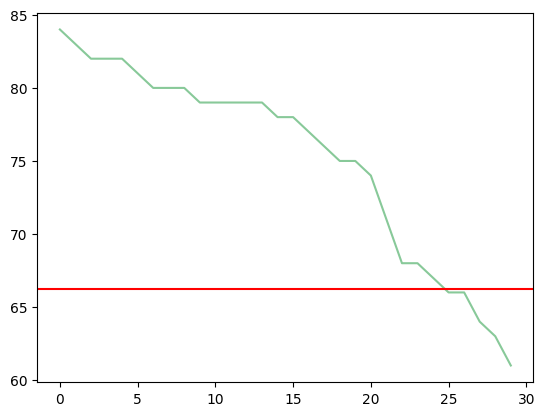

In [48]:
# Bueno ya tienen algo hecho ahora viene lo bueno, plotear

x = np.arange(len(anom_team))
# Graficar
fig, ax = plt.subplots()
#plt.plot(x, anom_team, color = '#88c999')
plt.plot(x, sevilla['Overall'], color = '#88c999')
plt.axhline(y = prom_ov, color='r', linestyle='-')

142      17.76
170      16.76
255      15.76
267      15.76
269      15.76
387      14.76
462      13.76
479      13.76
546      13.76
569      12.76
618      12.76
642      12.76
660      12.76
688      12.76
845      11.76
879      11.76
1191     10.76
1487      9.76
1764      8.76
1944      8.76
2376      7.76
4122      4.76
6758      1.76
6843      1.76
7882      0.76
9752     -0.24
9757     -0.24
11743    -2.24
12950    -3.24
14606    -5.24
Name: Overall, dtype: float64

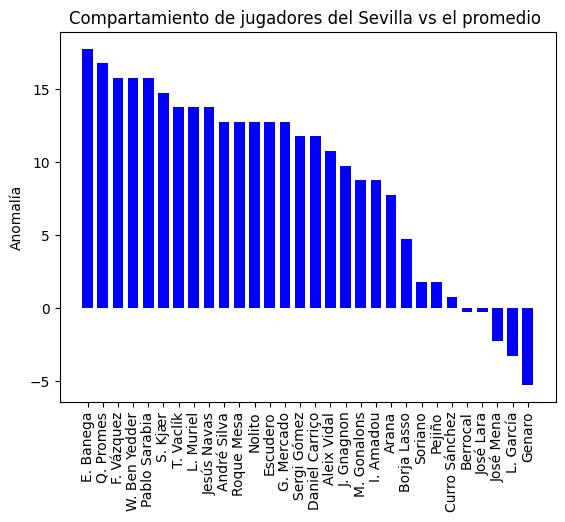

In [49]:
# Ahora, no es mal gráfico pero ya es momento que hagan gráficos cada vez más interesantes
# Supongamos que son entrenadores y quieren resaltar a los jugadores que estén  10 puntos
# por arriba de la media así como los que están por debajo de la media
# O quizás algo así?

fifa2 = fifa[['Club', 'Overall', 'Name']]
sevilla = fifa2[fifa2['Club'] == 'Sevilla FC']
jugadores = sevilla['Name']

cantidad = np.array(len(jugadores))
fig, ax = plt.subplots()
plt.bar(jugadores, anom_team, color = ['blue'], width = 0.7);
plt.title('Compartamiento de jugadores del Sevilla vs el promedio ');
plt.ylabel('Anomalía');
plt.xticks(rotation = 90);
anom_team

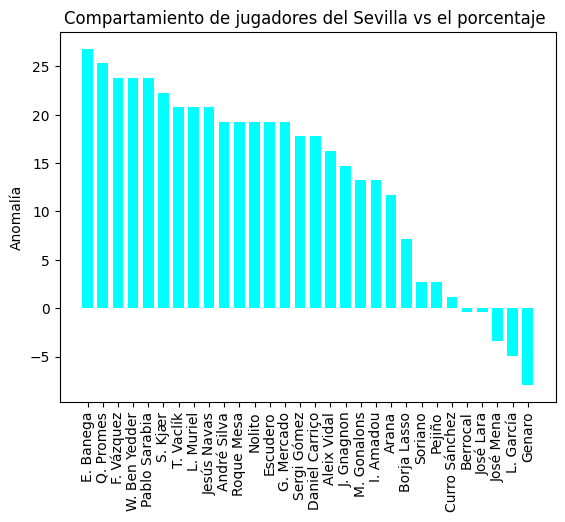

In [50]:
# O quizás algo así?
jugadores = sevilla['Name']
cantidad = np.array(len(jugadores))

colores = []
for ii in range(len(percent)):
  if percent.iloc[ii] <= 20:
    color = 'blue'
  elif percent.iloc[ii] <= -3:
    color = 'red'
  else:
    color = 'aqua'
    colores.append(color)
fig, ax = plt.subplots()
plt.bar(jugadores, percent, color = colores, width = 0.7);
plt.title('Compartamiento de jugadores del Sevilla vs el porcentaje ');
plt.ylabel('Anomalía');
plt.xticks(rotation = 90);

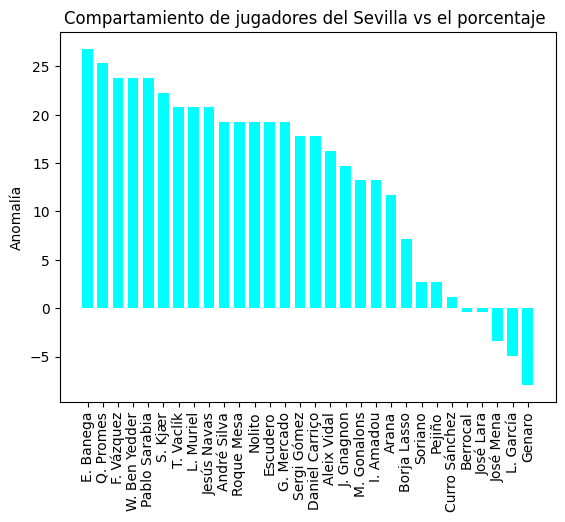

In [51]:
# O quizás algo así?
jugadores = sevilla['Name']
cantidad = np.array(len(jugadores))

colores2 = []
for ii in range(len(anom_team)):
  if anom_team.iloc[ii] >= 10:
    color2 = 'blue'
  elif anom_team.iloc[ii] <= -5:
    color2 = 'red'
  else:
    color2 = 'aqua'
    colores2.append(color2)
fig, ax = plt.subplots()
plt.bar(jugadores, percent, color = colores2, width = 0.7);
plt.title('Compartamiento de jugadores del Sevilla vs el porcentaje ');
plt.ylabel('Anomalía');
plt.xticks(rotation = 90);

Recuerden que lo importante es la interpretación ¿Qué significa cada barra? y ¿Qué podemos saber de cada jugador a partir de ella?

Ahora, lo interesante de las anomalías es que pueden detectar extremos de diferentes maneras. Por ejemplo, en vez de presentar el valor absoluto podrían utilizar porcentajes, de esta manera puede ser más intuitivo ver las diferencias que hay con respecto a la media.

In [52]:
# Básicamente una anomalía porcentual en vez de considerar el 0 como línea base,
# Considera que el 100% es el 0, entonces las anomalías se van a
# moverse alrededor de ese valor.

# Entonces haríamos una regla de 3

percent = (anom_team * 100) / prom_ov
percent

142      26.811594
170      25.301932
255      23.792271
267      23.792271
269      23.792271
387      22.282609
462      20.772947
479      20.772947
546      20.772947
569      19.263285
618      19.263285
642      19.263285
660      19.263285
688      19.263285
845      17.753623
879      17.753623
1191     16.243961
1487     14.734300
1764     13.224638
1944     13.224638
2376     11.714976
4122      7.185990
6758      2.657005
6843      2.657005
7882      1.147343
9752     -0.362319
9757     -0.362319
11743    -3.381643
12950    -4.891304
14606    -7.910628
Name: Overall, dtype: float64

Bueno, es su turno :)

Ahora que son expertos, hagan el siguiente ejercicio:


In [79]:
sp = fifa[['Club', 'ShotPower']]
prom_sp = np.mean(sp['ShotPower']).round(2)

# Ahora obtengamos un club en particular
tff = sp[sp['Club']=='Trelleborgs FF']

# Ahora obtengamos la anomalía pero de cada jugador
anom2 = tff['ShotPower'] - prom_sp
anom2

10511   -20.46
11024     2.54
11666    -7.46
12493    -4.46
12604    10.54
12884    -0.46
13045    11.54
13379     5.54
13581    10.54
13685     9.54
13723     5.54
13840   -10.46
13885    11.54
13934    -3.46
14793   -18.46
15184     9.54
15528     3.54
15632    -6.46
15734   -33.46
16069   -18.46
16256   -32.46
16387   -23.46
16498    -1.46
17279    -3.46
17464    -9.46
17906   -10.46
18203   -14.46
Name: ShotPower, dtype: float64

In [80]:
fifa3 = fifa[['Club', 'ShotPower', 'Name']]
trelle = fifa3[fifa3['Club'] == 'Trelleborgs FF']
jugadores2 = trelle['Name']

In [81]:
len(jugadores2)
len (anom2)

27

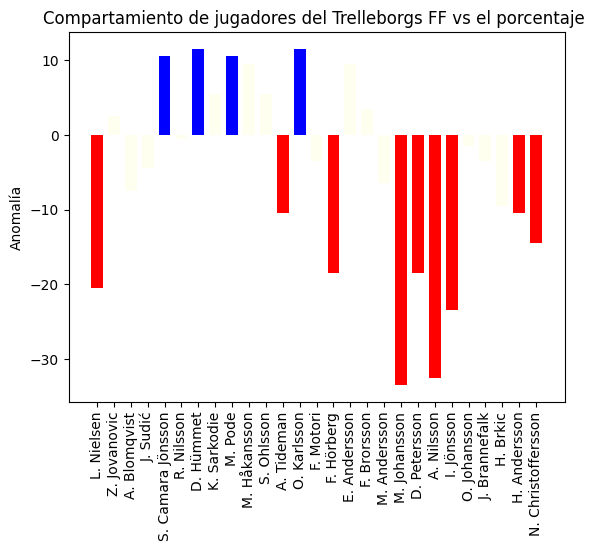

In [82]:
colores2 = []
for ii in range(len(anom2)):
  if anom2.iloc[ii] > 10:
    color2 = 'blue'
  elif anom2.iloc[ii] < -10:
    color2 = 'red'
  else:
    color2 = 'ivory'
  colores2.append(color2)
fig, ax = plt.subplots()
plt.bar(jugadores, anom2, color = colores2, width = 0.7);
plt.title('Compartamiento de jugadores del Trelleborgs FF vs el porcentaje ');
plt.ylabel('Anomalía');
plt.xticks(rotation = 90);